# **Лабораторна робота 6: Пошук аномалій та вирішення задачі *anomaly detection* за допомогою бібліотек `scikit-learn`та `PyTorch`**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

### Мета роботи:
Ознайомитися з основними методами виявлення аномалій, навчитися використовувати бібліотеки `scikit-learn` та `PyTorch` для реалізації алгоритмів пошуку аномалій, проаналізувати ефективність різних методів на реальних наборах даних з Kaggle.


### Опис завдання:

1. **Постановка задачі**:
   Використовуючи один із доступних наборів даних Kaggle (наприклад, *Credit Card Fraud Detection*, *Network Intrusion*, або інші), вам потрібно розв'язати задачу виявлення аномалій. Основна мета — ідентифікувати аномальні записи серед нормальних. Вибраний набір даних повинен містити мітки аномалій для перевірки результатів.

2. **Етапи виконання завдання**:
   - Завантажте та підготуйте набір даних.
   - Проведіть попередню обробку даних (масштабування, заповнення пропущених значень, видалення нерелевантних ознак).
   - Використайте різні методи виявлення аномалій:
     - **Методи з бібліотеки scikit-learn**:
       - Isolation Forest
       - One-Class SVM
       - Local Outlier Factor (LOF)
     - **Методи з використанням PyTorch**:
       - Автоенкодери для виявлення аномалій.
   - Порівняйте отримані результати, обчисліть метрики якості (Precision, Recall, F1-Score).
   - Оцініть, який метод найкраще підходить для вирішення задачі на вашому наборі даних.

### Покрокова інструкція

1. **Підготовка середовища**:
   - Встановіть необхідні бібліотеки:
     ```
     pip install scikit-learn torch pandas numpy matplotlib
     ```

2. **Вибір набору даних з Kaggle**:
   Зареєструйтесь на Kaggle та оберіть один із наборів даних для виявлення аномалій. Наприклад:
   - [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
   - [Network Intrusion Detection](https://www.kaggle.com/xyuanh/benchmarking-datasets)

3. **Попередня обробка даних**:
   - Завантажте дані та проведіть їхню початкову обробку.
   - Масштабуйте ознаки за допомогою `StandardScaler` або `MinMaxScaler`.
   - Розділіть дані на навчальну і тестову вибірки.

4. **Методи з бібліотеки `scikit-learn`**:

   - **Isolation Forest**:
     ```
     from sklearn.ensemble import IsolationForest
     ```

   - **One-Class SVM**:
     ```
     from sklearn.svm import OneClassSVM
     ```

   - **Local Outlier Factor**:
     ```
     from sklearn.neighbors import LocalOutlierFactor
     ```

5. **Методи на основі нейронних мереж (PyTorch)**:

   Використайте автоенкодер для пошуку аномалій. Побудуйте нейронну мережу з енкодером і декодером. Під час навчання порівняйте відновлені дані з вхідними та обчисліть помилку. Записи з великою помилкою можуть бути аномаліями.

   - **Реалізація автоенкодера**:
     ```
     import torch
     import torch.nn as nn
     import torch.optim as optim
     ```

6. **Оцінка результатів**:
   Використовуйте метрики оцінки якості:
   - `Precision`, `Recall`, `F1-score`
   ```
   from sklearn.metrics import classification_report
   ```

7. **Звіт**:
   - Поясніть, який метод дав найкращі результати.
   - Проаналізуйте, чому деякі методи працюють краще на вашому наборі даних.
   - Оцініть можливості використання глибоких нейронних мереж (автоенкодерів) для вирішення задачі.


### Результати, які необхідно надати:
1. Код рішення у вигляді Jupyter Notebook з аналізом результатів та поясненнями.


### Дедлайн:
[23 жовтня 23:59]


### Корисні ресурси:
- [Документація PyTorch](https://pytorch.org/docs/stable/index.html)
- [Документація scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Datasets](https://www.kaggle.com/datasets)

In [1]:
import pandas as pd

df = pd.read_csv('creditcard.csv')

print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Class', axis=1))
y = df['Class']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.001)
y_pred_iso = iso_forest.fit_predict(X_test)

In [5]:
from sklearn.svm import OneClassSVM

oneclass_svm = OneClassSVM(nu=0.001, kernel='rbf')
y_pred_svm = oneclass_svm.fit_predict(X_test)

In [6]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.001)
y_pred_lof = lof.fit_predict(X_test)

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)


input_dim = X_train.shape[1]
model = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 50
train_loader = DataLoader(X_train_tensor, batch_size=64, shuffle=True)

for epoch in range(num_epochs):
    for data in train_loader:
        output = model(data)
        loss = criterion(output, data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


model.eval()
with torch.no_grad():
    reconstructed = model(X_test_tensor)
    reconstruction_error = torch.mean((reconstructed - X_test_tensor) ** 2, dim=1)

In [9]:
from sklearn.metrics import classification_report

threshold = 0.02  
y_pred_auto = [1 if err > threshold else 0 for err in reconstruction_error.numpy()]

print(classification_report(y_test, y_pred_auto))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.82      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.90      0.59     56962
weighted avg       1.00      0.99      0.99     56962



Для 1 класу аномалій Precision = 0.11 має труднощі з точним виявленням аномалій. Багато передбачень аномалій є хибнопозитивними.
Recall = 0.82 виявляє значну частину аномалій, що є позитивним аспектом.
F1-Score = 0.19 показує, що модель недостатньо добре збалансована в точності й повноті для аномалій.

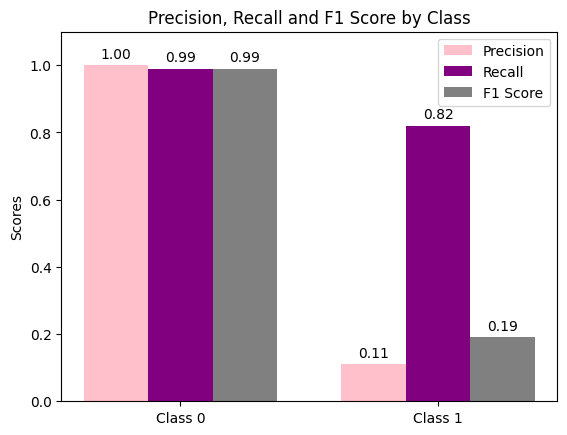

In [10]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Class 0', 'Class 1']
precision = [1.00, 0.11]
recall = [0.99, 0.82]
f1_score = [0.99, 0.19]

x = np.arange(len(labels))  
width = 0.25  


fig, ax = plt.subplots()
bars1 = ax.bar(x - width, precision, width, label='Precision', color='pink')
bars2 = ax.bar(x, recall, width, label='Recall', color='purple')
bars3 = ax.bar(x + width, f1_score, width, label='F1 Score', color='grey')


ax.set_ylabel('Scores')
ax.set_title('Precision, Recall and F1 Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  
                    textcoords="offset points", 
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)


plt.ylim(0, 1.1)  
plt.show()


Отже метод із найвищими значеннями F1-Score та Recall найімовірніше найкраще підходить для завдання, оскільки має здатність правильно виявляти аномалії при мінімальній кількості хибнопозитивних результатів.
F1-Score є найбільш збалансованим, бо враховує як точність, так і повноту.